In [1]:
# [예제 2.25] 기본 설정

import pandas as pd
import xlwings as xw

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

# font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# rc('font', family=font_name)
# 맥OS인 경우 위 두 줄을 입력하지 말고 아래 코드를 입력하세요
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [12]:
# [예제 2.26] 소득 데이터 읽어오기 

#path = r'C:\Users\JK\Desktop\부동산 데이터\행정구역_시도_별_1인당_지역내총생산__지역총소득__개인소득_20180821155737.xlsx'
path = r'데이터/행정구역_시도_별_1인당_지역내총생산__지역총소득__개인소득_20180821155737.xlsx'
raw = pd.read_excel(path, sheet_name='데이터', index_col=0)

raw

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
행정구역(시도)별,,,,,,,,,,,,,,,,,
행정구역(시도)별,1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원),1인당 개인소득 (천원)
전국,8602,8964,9419,9848,10493,11198,11656,12407,12883,13173,14068,14706,15256,15799,16394,17222,17653
서울특별시,10119,10616,11185,11787,12493,13453,13955,15130,15401,15405,16495,17215,18018,18565,19104,19962,20506
부산광역시,8231,8539,9024,9364,9835,10581,11077,11825,12469,12791,13672,14694,15430,15972,16369,17170,17599
대구광역시,8253,8481,8886,9261,9711,10482,10925,11562,12017,12315,13376,14183,14635,15047,15851,16686,16987
인천광역시,7761,7979,8409,8766,9378,10021,10489,11074,11625,12056,13022,13513,14167,14714,15549,16299,16974
광주광역시,7985,8426,8686,9175,9657,10499,10997,11665,12180,13107,13464,13927,14528,14849,15341,16105,16575
대전광역시,8047,8461,8864,9391,9912,10697,11313,11963,12439,13229,14205,14801,15280,15721,16207,17064,17680
울산광역시,9714,10394,10952,11517,12667,13555,13931,15380,16046,16260,17329,18507,18694,19011,19238,19963,19496


In [13]:
# [예제 2.27] 첫 번째 행 제거

raw.drop(['행정구역(시도)별'], inplace=True)

In [16]:
index_list = raw.index
index_list

Index(['전국', '서울', '부산', '대구', '인천', '광주', '대전', '울산', '경기', '강원', '충북', '충남',
       '전북', '전남', '경북', '경남', '제주'],
      dtype='object')

In [17]:
# [예제 2.28] 인덱스의 시도 이름을 약어로 변경하기 

index_list = raw.index
new_index = []
for temp in index_list:
    if temp[-1] == '시':
        new_index.append(temp[:2])
    elif temp[-1] == '도':
        if len(temp) == 3:
            new_index.append(temp[:2])
        elif len(temp) == 4:
            new_index.append(temp[0] + temp[2])
        else:
            new_index.append('제주')
    else:
        new_index.append(temp)
        
raw.index = new_index

In [18]:
# [예제 2.29] 컬럼과 인덱스 서로 바꾸기 

income_data = raw.T

income_data

,전국,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주
2000,8602,10119,8231,8253,7761,7985,8047,9714,8865,7485,7834,8092,7611,7148,7938,7855,8512
2001,8964,10616,8539,8481,7979,8426,8461,10394,9126,7833,8093,8280,8086,7579,8165,8412,8477
2002,9419,11185,9024,8886,8409,8686,8864,10952,9672,8294,8538,8610,8195,7768,8647,8697,9084
2003,9848,11787,9364,9261,8766,9175,9391,11517,9952,8676,9006,9047,8668,8317,8898,9156,9395
2004,10493,12493,9835,9711,9378,9657,9912,12667,10554,9284,9621,9966,9289,9017,9687,9828,9689
2005,11198,13453,10581,10482,10021,10499,10697,13555,11181,9681,10286,10171,9840,9495,10332,10425,10746
2006,11656,13955,11077,10925,10489,10997,11313,13931,11583,10090,10783,10645,10316,9926,10670,10952,10867
2007,12407,15130,11825,11562,11074,11665,11963,15380,12084,10779,11354,11184,11150,10639,11260,11680,11501
2008,12883,15401,12469,12017,11625,12180,12439,16046,12592,11194,11845,11564,11666,11148,11764,12412,11949
2009,13173,15405,12791,12315,12056,13107,13229,16260,12697,11908,12287,11870,12225,11664,12212,12699,13598


In [21]:
# [예제 2.30] 소득 데이터 전처리 과정 함수화 

def income_preprocessing(path):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    
    raw = pd.read_excel(path)
    raw.drop([0], inplace=True)
    raw.set_index('행정구역(시도)별', inplace=True)
    index_list = raw.index
    new_index = []
    for temp in index_list:
        if temp[-1] == '시':
            new_index.append(temp[:2])
        elif temp[-1] == '도':
            if len(temp) == 3:
                new_index.append(temp[:2])
            elif len(temp) == 4:
                new_index.append(temp[0] + temp[2])
            else:
                new_index.append('제주')
        else:
            new_index.append(temp)

    raw.index = new_index
    income_data = raw.T
    return income_data


income_data_path = path
income_data = income_preprocessing(income_data_path)
income_data

,전국,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주
2000,8602,10119,8231,8253,7761,7985,8047,9714,8865,7485,7834,8092,7611,7148,7938,7855,8512
2001,8964,10616,8539,8481,7979,8426,8461,10394,9126,7833,8093,8280,8086,7579,8165,8412,8477
2002,9419,11185,9024,8886,8409,8686,8864,10952,9672,8294,8538,8610,8195,7768,8647,8697,9084
2003,9848,11787,9364,9261,8766,9175,9391,11517,9952,8676,9006,9047,8668,8317,8898,9156,9395
2004,10493,12493,9835,9711,9378,9657,9912,12667,10554,9284,9621,9966,9289,9017,9687,9828,9689
2005,11198,13453,10581,10482,10021,10499,10697,13555,11181,9681,10286,10171,9840,9495,10332,10425,10746
2006,11656,13955,11077,10925,10489,10997,11313,13931,11583,10090,10783,10645,10316,9926,10670,10952,10867
2007,12407,15130,11825,11562,11074,11665,11963,15380,12084,10779,11354,11184,11150,10639,11260,11680,11501
2008,12883,15401,12469,12017,11625,12180,12439,16046,12592,11194,11845,11564,11666,11148,11764,12412,11949
2009,13173,15405,12791,12315,12056,13107,13229,16260,12697,11908,12287,11870,12225,11664,12212,12699,13598


In [23]:
# [예제 2.31] KB 가격지수 데이터 가져오기 

def KBpriceindex_preprocessing(path, data_type):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    # data_type : ‘매매종합’, ‘매매APT’, ‘매매연립’, ‘매매단독’, ‘전세종합’, ‘전세APT’, ‘전세연립’, ‘전세단독’ 중 하나
    
    wb = xw.Book(path)                
    sheet = wb.sheets[data_type]   
    row_num = sheet.range((1,1)).end('down').end('down').end('down').row  
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 
    
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])

    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1
                
    big_col[129] = '경기' 
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1])
    
    index_list = list(new_col_data['구분']['구분'])

    new_index = []

    for num, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        if int(temp[0]) > 12 :
            if len(temp[0]) == 2:
                new_index.append('19' + temp[0] + '.' + temp[1])
            else:
                new_index.append(temp[0] + '.' + temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data



path = r'데이터/★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
data_type = '매매종합'
price_data = KBpriceindex_preprocessing(path, data_type)

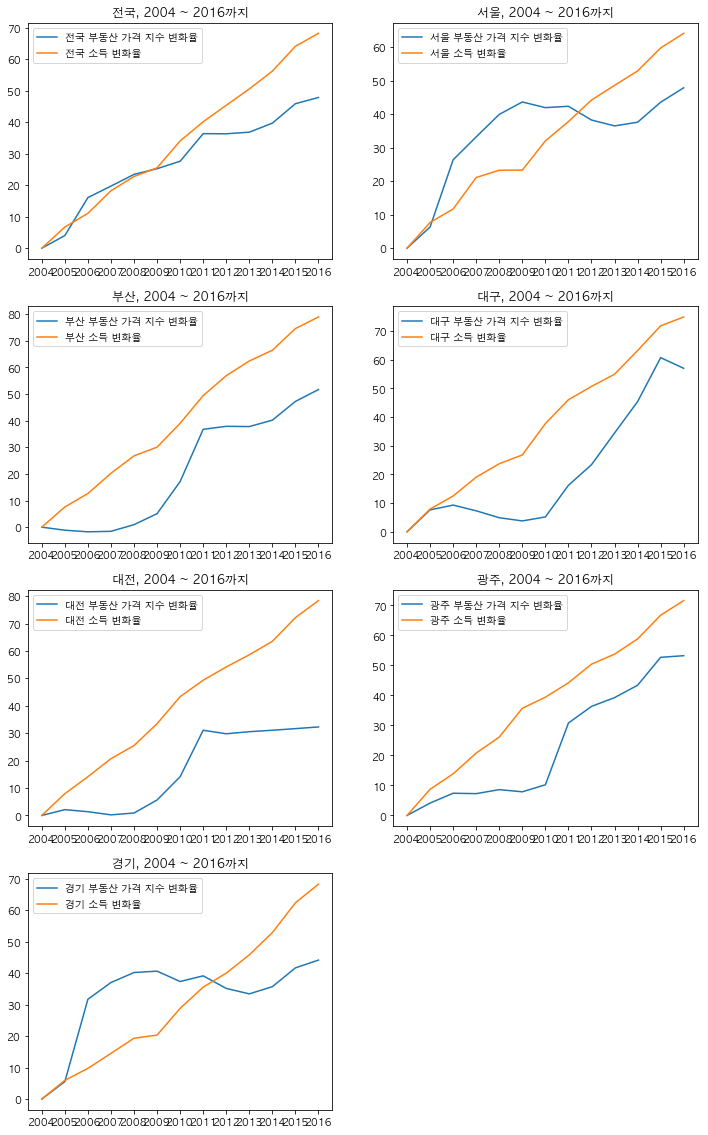

In [24]:
# [예제 2.32] 특정 지역들의 부동산 가격지수 변화와 개인소득 변화를 subplot으로 나타내기 

location_list = ['전국', '서울', '부산', '대구', '대전' ,'광주', '경기']
start_year = '2004'
end_year = '2016'

num_row = int((len(location_list)-1)/2)+1
plt.figure(figsize=(12, num_row*5))
for j, location in enumerate(location_list):
    year_data = []
    for i in range(int(start_year), int(end_year) + 1):
        if location == '제주도':
            year_data.append(price_data[location]['서귀포'][str(i)+'.12.1'])
        else:
            year_data.append(price_data[location][location][str(i)+'.12.1'])

    temp_df = pd.DataFrame(income_data[location][start_year:end_year])
    temp_df.columns = [location + '소득']
    temp_df[location + '부동산 가격지수'] = year_data
    temp_df['소득 변화율'] = (temp_df[location + '소득']/temp_df[location + '소득'][0] - 1 )*100
    temp_df['부동산 기격 지수 변화율'] = (temp_df[location + '부동산 가격지수']/temp_df[location + '부동산 가격지수'][0] - 1 )*100

    plt.subplot(num_row, 2, j+1)
    plt.title(location + ', ' + start_year + ' ~ ' + end_year + '까지')
    plt.plot(temp_df['부동산 기격 지수 변화율'], label=location + ' 부동산 가격 지수 변화율')
    plt.plot(temp_df['소득 변화율'], label=location + ' 소득 변화율')
    plt.legend()

In [26]:
# [예제 2.33] PIR 데이터 가져오기 (ch02/ 2.2 ‘기준’이 필요해!.ipynb)

path = r'데이터/★(월간)KB주택가격동향_시계열(2019.01)12831994601335062.xls'
wb = xw.Book(path)                
sheet = wb.sheets['PIR(월별)']   
row_num = sheet.range('J2').end('down').row  
data_range = 'B2:N' + str(row_num)
pir_rawdata = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 

In [27]:
# [예제 2.34] 지역을 구분하는 상위 컬럼 만들기 

big_col = list(pir_rawdata.columns)
big_col[0] = 'index1'
big_col[1] = 'index2'
big_col[2] = 'index3'

for num, col in enumerate(big_col):
    if col == None:
        big_col[num] = big_col[num - 1]
    else:
        pass

In [28]:
# [예제 2.35] 소득 분위를 나타내는 하위 컬럼 만들기 

small_col = list(pir_rawdata.loc[1])
small_col[0] = 'index1'
small_col[1] = 'index2'
small_col[2] = 'index3'

In [29]:
# [예제 2.36] 이중 컬럼 설정 

pir_rawdata.columns = [big_col, small_col]
pir_rawdata.drop([0,1], inplace=True)

In [30]:
# [예제 2.37] 상위 인덱스 설정

big_index = list(pir_rawdata['index1']['index1'])
for num, index in enumerate(big_index):
    if index is not None:
        if type(index) == str:
            big_index[num] = '20' + index.split(".")[0][1:] + '.' + index.split(".")[1][:2]
        else:
            big_index[num] = big_index[num - 1].split(".")[0] + "." +  str(int(index))
    else:
        big_index[num] = big_index[num - 1]

In [31]:
# [예제 2.38] 하위 인덱스 및 이중 인덱스 설정  

small_index = list(pir_rawdata['index3']['index3'])
pir_rawdata.index = [pd.to_datetime(big_index), small_index]

del pir_rawdata['index1']
del pir_rawdata['index2']
del pir_rawdata['index3']

pir_rawdata.index.names = ['날짜', '평균주택가격']

In [37]:
pir_rawdata.xs('3분위', level='평균주택가격')

전국 All cities                                     서울 Seoul  \
                     1분위      2분위      3분위      4분위      5분위      1분위   
날짜                                                                      
2008-12-01       15.3718  7.47314  5.24855  3.91582  2.36615  33.9684   
2009-01-01       16.1499  7.47533  5.16789   3.7696  2.18144  36.6966   
2009-02-01       16.0198  7.41512  5.12626  3.73924  2.16387  36.7269   
2009-03-01        15.955   7.3851  5.10551   3.7241  2.15511  36.5496   
2009-04-01       15.3934  7.25673  5.14141   3.8634  2.41433     35.8   
2009-05-01       15.3845  7.25253  5.13844  3.86117  2.41294  35.8723   
2009-06-01       15.4351   7.2764  5.15536  3.87388  2.42088  35.8635   
2009-07-01       15.1339  7.13711  5.02616  3.73976  2.29737  35.5628   
2009-08-01       15.2214  7.17839  5.05524  3.76139  2.31066  35.7457   
2009-09-01       15.3912  7.25844  5.11161  3.80333  2.33643   36.361   
2009-10-01       14.6615   7.0732   4.9948  3.77517  2.29194  34.4852   
2009-11-01        14.713  7.09805  5.01236  3.78844  2.29999  34.2901   
2009-12-01       14.7446  7.11331  5.02313  3.79658  2.30493  34.1943   
2010-01-01       14.8371  7.07447  4.97248    3.648  2.08903  34.4483   
2010-02-01       14.8419  7.07676  4.97409  3.64918  2.08971   34.706   
2010-03-01       14.8847  7.09717  4.98843   3.6597  2.09574  34.7124   
2010-04-01       14.1639  6.89908   5.0213  3.76201  2.37671  32.9582   
2010-05-01       14.1727  6.90337  5.02443  3.76435  2.37819  32.6293   
2010-06-01       14.1071  6.87144  5.00119  3.74694  2.36719  32.4638   
2010-07-01       14.1309  6.67776  4.82342  3.61066  2.26928  32.2993   
2010-08-01       14.1279  6.67636   4.8224   3.6099   2.2688  32.2131   
2010-09-01       14.1311  6.67785  4.82348   3.6107  2.26931  31.8737   
2010-10-01       14.2894  6.73977  4.85239  3.67487   2.3023  32.3222   
2010-11-01        14.373  6.77919  4.88078  3.69636  2.31576   32.322   
2010-12-01       14.4511  6.81603   4.9073  3.71645  2.32835  32.3278   
2011-01-01       14.6845  6.74169   4.8192  3.55598  2.07435   32.619   
2011-02-01       14.8377  6.81202  4.86948  3.59308  2.09599  32.5772   
2011-03-01       14.9707  6.87309  4.91313  3.62529  2.11478  32.5161   
2011-04-01       14.5882  6.89823  4.97282   3.7875  2.38314  31.3746   
2011-05-01       14.7221  6.96156  5.01847  3.82227  2.40501  31.4021   
...                  ...      ...      ...      ...      ...      ...   
2016-04-01       15.5139  7.65286  5.51465  4.19741  2.63788  27.6317   
2016-05-01       15.5452  7.66831  5.52579  4.20589  2.64321  27.7277   
2016-06-01        15.558  7.67465  5.53036  4.20937   2.6454  27.9379   
2016-07-01       15.3713  7.49963  5.41033  4.08546  2.54869  28.1535   
2016-08-01       15.4765  7.55096  5.44736  4.11343  2.56613     28.6   
2016-09-01       15.6162   7.6191  5.49651  4.15054  2.58929  28.8958   
2016-10-01       16.3069  7.79525   5.6898  4.32835   2.6891  30.1511   
2016-11-01       16.4069  7.84308  5.72472  4.35491   2.7056  30.4474   
2016-12-01        16.438  7.85792  5.73555  4.36315  2.71072  30.5049   
2017-01-01       16.0802  7.93085  5.58575  4.16416  2.42055  29.4123   
2017-02-01       16.0889  7.93513  5.58877  4.16641  2.42186  29.4706   
2017-03-01       16.1031  7.94214   5.5937  4.17009    2.424  29.5195   
2017-04-01       15.7344  7.88845  5.71827   4.3473  2.72429  29.3884   
2017-05-01       15.7428  7.89262  5.72129   4.3496  2.72573  29.5795   
2017-06-01        15.775   7.9088  5.73302  4.35852  2.73132  29.9008   
2017-07-01       16.0282   7.9466  5.58586   4.2187  2.53692   30.827   
2017-08-01       16.0944  7.97941  5.60892  4.23611  2.54739  31.2441   
2017-09-01       16.1313   7.9977  5.62178  4.24582  2.55323  31.7564   
2017-10-01       15.1858  7.84685  5.65877  4.29815  2.70446  30.0439   
2017-11-01       15.2076  7.85812   5.6669  4.30433  2.70835  30.2148   
2017-12-01       15.2183  7.86365  5.67089  4.30736  2.71026  30.4848

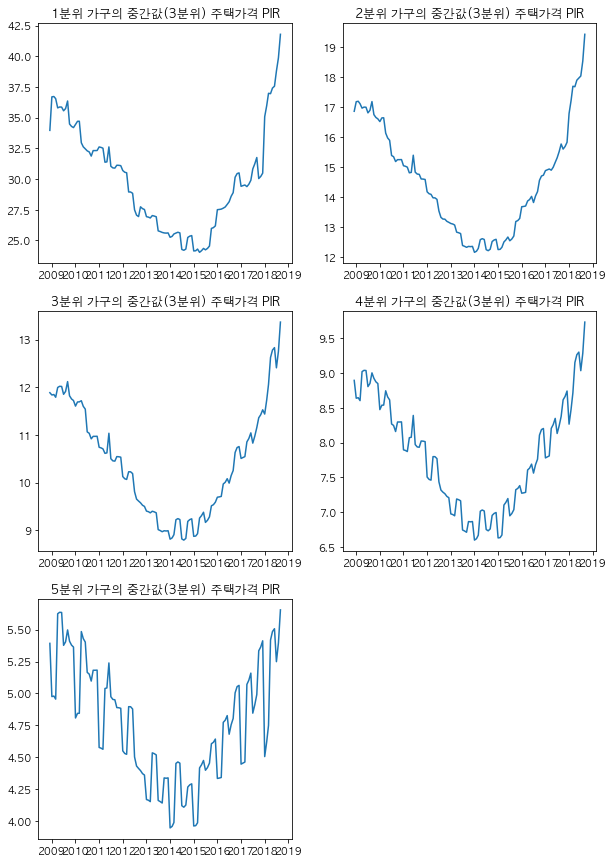

In [33]:
# [예제 2.39] 서울 각 소득 분위의 3분위 주택가격 시계열 subplot으로 나타내기  

gagus = ['1분위', '2분위', '3분위', '4분위', '5분위']
location = '서울 Seoul'
num_row = int((len(gagus)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, gagu in enumerate(gagus):
    plt.subplot(num_row, 2, i+1)
    plt.title(gagu + " 가구의 중간값(3분위) 주택가격 PIR")
    plt.plot(pir_rawdata.xs('3분위', level='평균주택가격')[location][gagu])
    
plt.show()

In [34]:
pir_rawdata

전국 All cities                                      서울 Seoul  \
                            1분위      2분위      3분위      4분위       5분위      1분위   
날짜         평균주택가격                                                               
2008-12-01 1분위          5.44195  2.64564  1.85809  1.38628  0.837666  16.7368   
           2분위          9.77107  4.75028  3.33623  2.48908   1.50404  25.9676   
           3분위          15.3718  7.47314  5.24855  3.91582   2.36615  33.9684   
           4분위          24.0716  11.7026  8.21899    6.132   3.70528  43.5412   
           5분위          45.7185  22.2264  15.6101  11.6463   7.03734  72.6804   
2009-01-01 1분위          5.81134   2.6899   1.8596  1.35644  0.784963  18.3022   
           2분위           10.317  4.77547   3.3014  2.40813   1.39357   28.298   
           3분위          16.1499  7.47533  5.16789   3.7696   2.18144  36.6966   
           4분위          25.3344  11.7266  8.10689  5.91339   3.42204  47.1468   
           5분위          48.1642  22.2938  15.4123  11.2422   6.50576   79.143   
2009-02-01 1분위          5.75459  2.66364  1.84144   1.3432  0.777298  17.9811   
           2분위          10.2198  4.73044  3.27027  2.38543   1.38043   28.176   
           3분위          16.0198  7.41512  5.12626  3.73924   2.16387  36.7269   
           4분위          25.3027  11.7119  8.09673  5.90598   3.41775  47.4761   
           5분위          48.0396  22.2361  15.3724  11.2131   6.48892  79.2791   
2009-03-01 1분위          5.74743  2.66032  1.83915  1.34153  0.776332   18.004   
           2분위          10.2307   4.7355  3.27377  2.38798   1.38191  28.0459   
           3분위           15.955   7.3851  5.10551   3.7241   2.15511  36.5496   
           4분위           25.124  11.6292  8.03955  5.86427   3.39361   47.405   
           5분위          47.2776  21.8835  15.1286  11.0352     6.386   79.034   
2009-04-01 1분위          5.56426  2.62309  1.85847  1.39651   0.87271  17.4965   
           2분위          9.86747   4.6517  3.29575  2.47651   1.54763  27.1915   
           3분위          15.3934  7.25673  5.14141   3.8634   2.41433     35.8   
           4분위          24.2906   11.451  8.11308  6.09639   3.80978  46.7941   
           5분위          46.3592  21.8546   15.484  11.6351   7.27107  77.6763   
2009-05-01 1분위          5.55436  2.61842  1.85516  1.39402  0.871157  17.5094   
           2분위          9.85206  4.64444   3.2906  2.47265   1.54522  27.2665   
           3분위          15.3845  7.25253  5.13844  3.86117   2.41294  35.8723   
           4분위          24.2565   11.435  8.10171  6.08785   3.80444  46.8979   
           5분위          46.5358  21.9378   15.543  11.6794   7.29877  77.7926   
...                         ...      ...      ...      ...       ...      ...   
2018-04-01 1분위          7.49585  3.54667  2.51921  1.82422   1.08719  17.3093   
           2분위          12.6109  5.96688  4.23828  3.06905   1.82908  27.5669   
           3분위          17.2454  8.15967  5.79582  4.19691   2.50125  36.9582   
           4분위          24.0748   11.391  8.09104  5.85894   3.49178  52.6464   
           5분위          41.8492   19.801  14.0647  10.1846   6.06977  95.9239   
2018-05-01 1분위          7.48377  3.54095  2.51515  1.82128   1.08544  17.3913   
           2분위           12.564  5.94468  4.22251  3.05764   1.82227  27.8134   
           3분위          17.2415  8.15781   5.7945  4.19596   2.50068   37.413   
           4분위           24.095  11.4006  8.09784  5.86387   3.49472  52.8511   
           5분위          41.9086  19.8291  14.0846  10.1991   6.07838  94.3884   
2018-06-01 1분위          7.48195  3.54009  2.51453  1.82084   1.08518     17.4   
           2분위          12.5654  5.94534  4.22299  3.05798   1.82248   27.992   
           3분위          17.2332  8.15388  5.79172  4.19394   2.49948  37.5641   
           4분위          24.1584  11.4306  8.11916   5.8793   3.50392  53.1846   
           5분위          42.3965  20.0599  14.2486  10.3178   6.14915  94.5234   
2018-07-01 1분위          7.50633  3.47905   2.3846

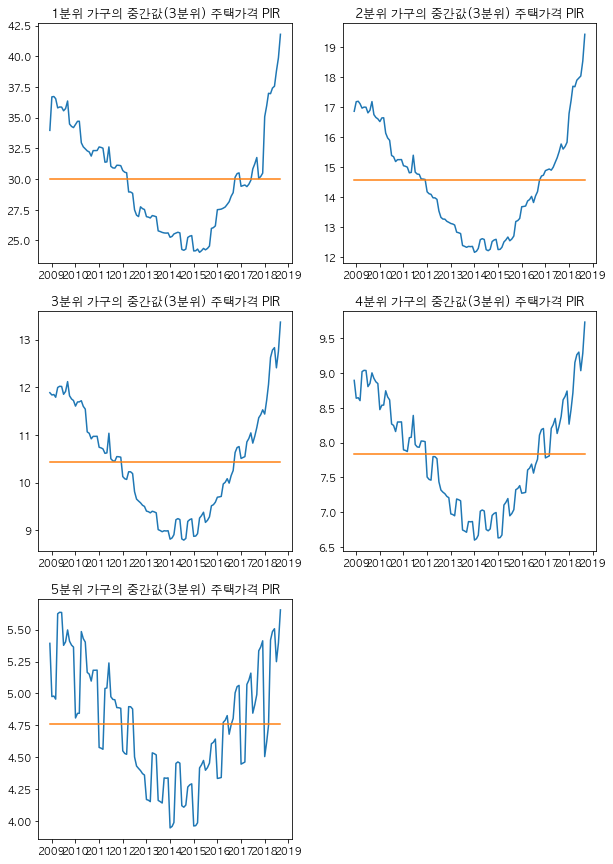

In [35]:
# [예제 2.40] PIR 그래프에 평균값 추가하기 

gagus = ['1분위', '2분위', '3분위', '4분위', '5분위']
location = '서울 Seoul'
house_price_level = '3분위'
num_row = int((len(gagus)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, gagu in enumerate(gagus):
    plt.subplot(num_row, 2, i+1)
    plt.title(gagu + " 가구의 중간값(" + house_price_level + ") 주택가격 PIR")
    plt.plot(pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu])
    indx = pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu].index
    long_mean = pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu].mean()
    plt.plot(indx, [long_mean for a in range(len(pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu]))])
    
plt.show()